In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [42]:
# P1(a) Find Z as a normalization constant

def f(x):
    y = np.exp(-(x**4 - 2*x**2 + 1)) / 1.97373
    return y

In [13]:
a = -3.0
b = 3.0
N = 100000
x_range = np.linspace(a, b, N+1)

s = 0

for i in range(N):
    s = s + 0.5 * (f(x_range[i]) + f(x_range[i+1])) * (b-a) / N
    
s

1.9737321500898

In [34]:
# P1(b) Find the sigma that minimizes c

from scipy.optimize import minimize_scalar

# Define your objective function
def f_g(x):
    p = np.sqrt(1+1/(4*x**2+1e-10))
    y = np.sqrt(2*np.pi*x**2) / 1.97373 * np.exp(p**4 - 1)
    return y  

# Use minimize_scalar to find the minimum
result = minimize_scalar(f_g, bounds=(1.0,1.2))

# Extract the minimum value and the corresponding argument
min_value = result.fun
min_arg = result.x

# Print the results
print(f"Minimum value: {min_value}")
print(f"Minimizing argument: {min_arg}")

Minimum value: 2.2039106798152908
Minimizing argument: 1.0986840969277196


<ipython-input-34-30f88dc853bf>:8: RuntimeWarning: overflow encountered in exp
  y = np.sqrt(2*np.pi*x**2) / 1.97373 * np.exp(p**4 - 1)
<ipython-input-34-30f88dc853bf>:8: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sqrt(2*np.pi*x**2) / 1.97373 * np.exp(p**4 - 1)


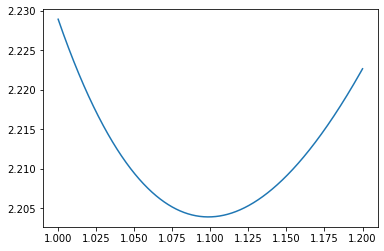

In [35]:
x_range = np.linspace(1, 1.2, 1000)
y = f_g(x_range)
plt.plot(x_range, y)

In [40]:
# P1(c), generate samples from density f

def g(sigma, x):
    y = 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-x**2/(2*sigma**2))
    return y

def sample_f(n):
    c = 2.20391
    sigma = 1.09868
    res = []
    trials = []
    for i in range(n):
        trial = 0
        while True:
            trial = trial + 1
            xi = sigma * np.random.randn()
            u = np.random.rand()
            if u <= f(xi) / (c * g(sigma, xi)):
                res.append(xi)
                trials.append(trial)
                break
    print("Average number of trials: " + str(np.mean(trials)))
    return res
            

Average number of trials: 2.2099


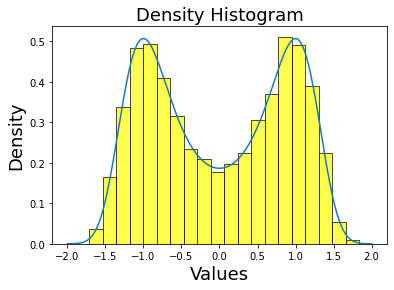

In [55]:
data = sample_f(10000)
plt.hist(data, bins=20, density=True, alpha=0.7, color='yellow', edgecolor='black')

x_range = np.linspace(-2, 2, 1000)
y = f(x_range)
plt.plot(x_range, y)

# Set labels and title
plt.xlabel("Values", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.title("Density Histogram", fontsize=18)

# Show the plot
plt.show()

In [57]:
# P1(d), find expectation of |x| using MC integration

print("The expected value using MC integration is: " + str(np.mean(np.abs(data))))

The expected value using MC integration is: 0.8269308158061358


In [70]:
# P2(a), find volume of the intersection of B^d and C^d using i.i.d samples uniformly in C^d

def vol_c(d):
    n = 100000
    s = 0
    for i in range(n):
        x = []
        for j in range(d):
            x.append(np.random.rand() - 0.5)
        if np.linalg.norm(x) <= 1:
            s = s + 1
    print("The volume of intersection of the unit cube and unit ball with dimension " + str(d) + " is: " + str(s/n))

In [71]:
vol_c(5)
vol_c(10)
vol_c(15)
vol_c(20)

The volume of intersection of the unit cube and unit ball with dimension 5 is: 0.99959
The volume of intersection of the unit cube and unit ball with dimension 10 is: 0.76149
The volume of intersection of the unit cube and unit ball with dimension 15 is: 0.1956
The volume of intersection of the unit cube and unit ball with dimension 20 is: 0.01746


In [91]:
# P2(b), find volume of the intersection of B^d and C^d using i.i.d samples uniformly in B^d

def vol_b(d):
    n = 100000
    s = 0
    for i in range(n):
        x = []
        for j in range(d):
            x.append(np.random.randn())
        x = x / np.linalg.norm(x) * np.random.rand()**(1/d)
        if max(np.abs(x)) <= 0.5:
            s = s + 1
    vol_bd = np.pi**(d/2) / (d/2 * math.gamma(d/2))
    print("The volume of intersection of the unit cube and unit ball with dimension " + str(d) + " is: " + str(s/n * vol_bd))

In [94]:
vol_b(5)
vol_b(10)
vol_b(15)
vol_b(20)

The volume of intersection of the unit cube and unit ball with dimension 5 is: 0.9929085216946589
The volume of intersection of the unit cube and unit ball with dimension 10 is: 0.7627030610465164
The volume of intersection of the unit cube and unit ball with dimension 15 is: 0.19699638238119555
The volume of intersection of the unit cube and unit ball with dimension 20 is: 0.018303795787281366
